# Sun and Earth Emission and Absorption


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
h = 6.63e-34
c = 2.998e8
k = 1.38e-23
rsun = 6.96e8
au = 149.6e11
omegasun = np.pi*rsun*rsun/au/au

In [76]:
def bl(T,l):
    x = h*c/(l*k*T)
    #bbfull = 2.0*h*c*c/(l*l*l*l*l)/(np.exp(h*c/(l*k*T))-1)
    bb = np.zeros(len(x))
    nrj = np.where(x <= 0.01)
    nwi = np.where(x >= 20.)
    nf = np.where((x >= 0.01) & (x <= 20.))
    bb[nrj] = 2.0*c*k*T/(l[nrj]*l[nrj]*l[nrj]*l[nrj])
    bb[nwi] = 2.0*h*c*c/(l[nwi]*l[nwi]*l[nwi]*l[nwi]*l[nwi])*np.exp(-h*c/(l[nwi]*k*T))
    bb[nf] = 2.0*h*c*c/(l[nf]*l[nf]*l[nf]*l[nf]*l[nf])/(np.exp(h*c/(l[nf]*k*T))-1)
    #dl = (l[1]-l[0])*1.e-6
    bbn = bb/(sum(bb))
    return bb, bbn

(0.1, 25.0)

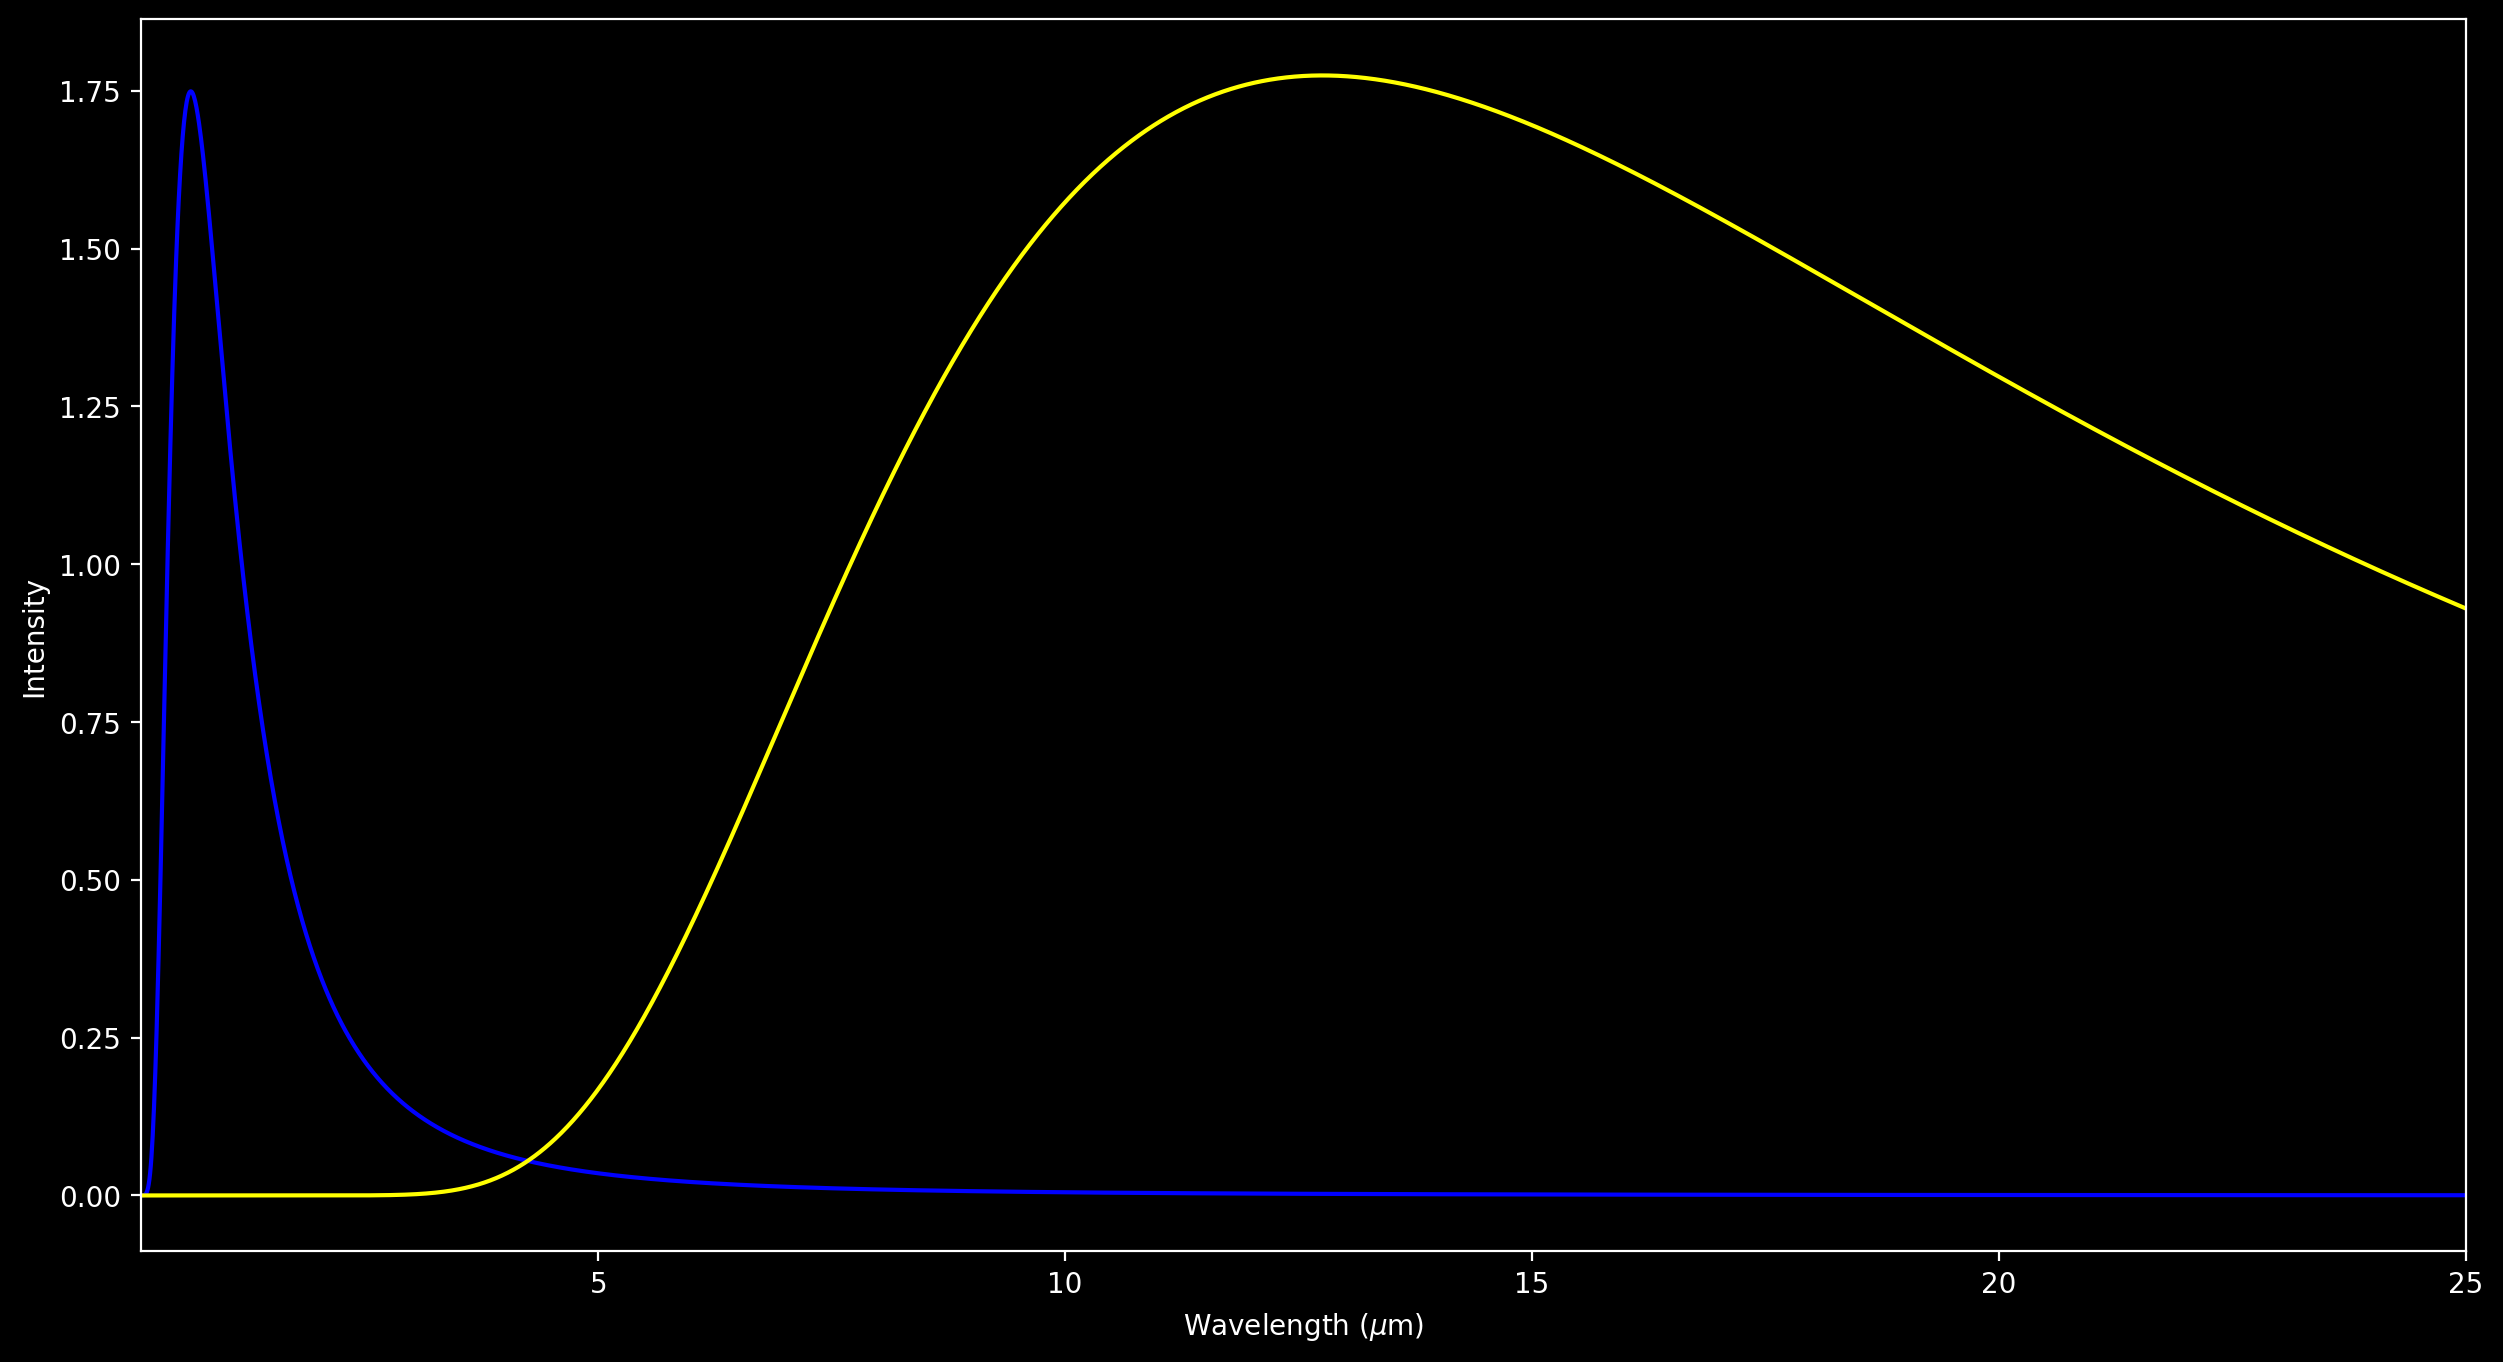

In [3]:
fig = plt.figure(figsize=(15,8))

wl = np.linspace(0.11,70.,10000)

Tsun = 5770.
Tearth = 288.

#plt.plot(np.log10(wl),np.log10(bl(Tsun,wl*1.e-6)[1]),color='blue')
#plt.plot(np.log10(wl),np.log10(340.*bl(Tearth,wl*1.e-6)[1]),color='yellow')
#plt.ylim(-4,2.5)

dwl = (wl[1]-wl[0])*1.e3
plt.plot(wl,340.*wl*bl(Tsun,wl*1.e-6)[1],color='blue')
plt.plot(wl,340.*wl*bl(Tearth,wl*1.e-6)[1],color='yellow')

#plt.xlabel("Log$_{10}$(Wavelength/$\mu$m)")
#plt.ylabel("Log$_{10}$(Intensity)")
plt.xlabel("Wavelength ($\mu$m)")
#plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
#plt.xlim(100.,70000.)
plt.xlim(0.1,25.)
#plt.xscale('log')
